In [2]:
import kinase_library as kl
import numpy as np
import pandas as pd

In [3]:
prot_info = pd.read_json('../data/phosphosite_sequences/phosphosite_df.json')
prot_info

,id,sites,sequence
0,A0A024R4G9,"[14, 16, 20]",MTVLEAVLEIQAITGSRLLSMVPGPARPPGSCWDPTQCTRTWLLSH...
1,A0A075B759,"[40, 79, 93, 119]",MVNSVVFFEITRDGKPLGRISIKLFADKIPKTAENFRALSTGEKGF...
2,A0A087WP46,"[359, 972, 973, 974, 988, 997, 1000, 1005, 101...",MARDGAEQPDSGPLPRPSPCPQEDRASNLMPPKPPRTWGLQLQGPS...
3,A0A087WPF7,"[32, 43, 622, 626, 798, 941, 956, 1031, 1038, ...",MDGPTRGHGLRKKRRSRSQRDRERRSRAGLGTGAAGGIGAGRTRAP...
4,A0A087WQ53,[58],MGQNNNVTEFILLGLTQDPAGQKVLFVMFLLIYIVKIVGNLLIVGT...
...,...,...,...
42252,XP_997087,"[347, 907, 915, 918, 927]",MENFLALMNSISDTWMSPSCMDIAMDMGIAFVCGAGLFFLLLPFLK...
42253,YP_009725299,"[504, 660, 661, 794, 1826]",APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...
42254,YP_009725305,[5],NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
42255,YP_009725309,[56],AENVTGLFKDCSKVITGLHPTQAPTHLSVDTKFKTEGLCVDIPGIP...


In [4]:
kinase_info = pd.read_csv('../data/kinase_library/kinome_information.tsv', sep='\t')
kinase_info

,MATRIX_NAME,KINASE,GENE_NAME,TYPE,SUBTYPE,FAMILY,UNIPROT_ID,UNIPROT_ENTRY_NAME,PDB_ID,KL_LIBRARY,DUAL_SPECIFICITY,DISPLAY_NAME
0,AAK1,AAK1,AAK1,ser_thr,STK,Other,Q2M2I8,AAK1_HUMAN,4WSQ,ser_thr,False,AAK1
1,ACVR2A,ACVR2A,ACVR2A,ser_thr,STK,TKL,P27037,AVR2A_HUMAN,3Q4T,ser_thr,False,ACVR2A
2,ACVR2B,ACVR2B,ACVR2B,ser_thr,STK,TKL,Q13705,AVR2B_HUMAN,2H62,ser_thr,False,ACVR2B
3,AKT1,AKT1,AKT1,ser_thr,STK,AGC,P31749,AKT1_HUMAN,1H10,ser_thr,False,AKT1
4,AKT2,AKT2,AKT2,ser_thr,STK,AGC,P31751,AKT2_HUMAN,1GZK,ser_thr,False,AKT2
...,...,...,...,...,...,...,...,...,...,...,...,...
398,VEGFR2,VEGFR2,KDR,tyrosine,RTK,VEGFR,P35968,VGFR2_HUMAN,1VR2,tyr,False,VEGFR2
399,VEGFR3,VEGFR3,FLT4,tyrosine,RTK,VEGFR,P35916,VGFR3_HUMAN,4BSJ,tyr,False,VEGFR3
400,WEE1_TYR,WEE1,WEE1,tyrosine,ncTK,WEE,P30291,WEE1_HUMAN,1X8B,ser_thr_tyr,False,WEE1 (Tyr)
401,YES,YES,YES1,tyrosine,nRTK,SRC,P07947,YES_HUMAN,2HDA,tyr,False,YES


In [5]:
kinase_info=kinase_info.set_index('MATRIX_NAME')

In [6]:
kinase_info

,KINASE,GENE_NAME,TYPE,SUBTYPE,FAMILY,UNIPROT_ID,UNIPROT_ENTRY_NAME,PDB_ID,KL_LIBRARY,DUAL_SPECIFICITY,DISPLAY_NAME
MATRIX_NAME,,,,,,,,,,,
AAK1,AAK1,AAK1,ser_thr,STK,Other,Q2M2I8,AAK1_HUMAN,4WSQ,ser_thr,False,AAK1
ACVR2A,ACVR2A,ACVR2A,ser_thr,STK,TKL,P27037,AVR2A_HUMAN,3Q4T,ser_thr,False,ACVR2A
ACVR2B,ACVR2B,ACVR2B,ser_thr,STK,TKL,Q13705,AVR2B_HUMAN,2H62,ser_thr,False,ACVR2B
AKT1,AKT1,AKT1,ser_thr,STK,AGC,P31749,AKT1_HUMAN,1H10,ser_thr,False,AKT1
AKT2,AKT2,AKT2,ser_thr,STK,AGC,P31751,AKT2_HUMAN,1GZK,ser_thr,False,AKT2
...,...,...,...,...,...,...,...,...,...,...,...
VEGFR2,VEGFR2,KDR,tyrosine,RTK,VEGFR,P35968,VGFR2_HUMAN,1VR2,tyr,False,VEGFR2
VEGFR3,VEGFR3,FLT4,tyrosine,RTK,VEGFR,P35916,VGFR3_HUMAN,4BSJ,tyr,False,VEGFR3
WEE1_TYR,WEE1,WEE1,tyrosine,ncTK,WEE,P30291,WEE1_HUMAN,1X8B,ser_thr_tyr,False,WEE1 (Tyr)


In [6]:
def mark_fn(row):
    buf = []
    print(row['id'])
    split_seq = list(row['sequence'])
    for i in row['sites']:
        idx = eval(i) - 1 # 1-based indices in sites
        split_seq[idx] = str.lower(split_seq[idx])
    
    win_size = 6
    for i in row['sites']:
        idx = eval(i) - 1
        if split_seq[idx] not in ['s', 't', 'y']:
            continue
        left = idx - win_size
        left_pad = []
        while left < 0:
            left_pad.append('_')
            left += 1

        right = idx + win_size + 1
        right_pad = []
        while right > len(split_seq):
            right_pad.append('_')
            right -= 1
        window = split_seq[left:right]
        window = left_pad + window + right_pad
        #window[win_size] = window[win_size] + '*'
        buf.append("".join(window))

    preds = {
        'Name' : [],
        'Family' : [],
        'Score' : [],
        'Score Rank' : [],
        'Percentile' : [],
        'Percentile Rank' : []
    }
    for window in buf:
        sub = kl.Substrate(window, pp=True) # using phosphopriming
        
        prediction = sub.predict().reset_index(names='Name').iloc[0].to_dict()
        preds['Family'].append(kinase_info.loc[prediction['Name']]['FAMILY'])
        for k, v in prediction.items():
            preds[k].append(v)

    return preds

In [ ]:
prot_info[prot_info['id'] == 'A6NK53']

,id,sites,sequence
795,A6NK53,"[18, 33, 100, 342, 347, 447, 475, 503, 531, 55...",MTKFQEMVTFKDVAVVFTREELGLLDLAQRKLYQDVMLENFRNLLS...


In [ ]:
mark_fn(prot_info.loc[795])

A6NK53
DVAVVFtREELGL
LAQRKLyQDVMLE
RLRFLSyEDLICW
STGENLyRCQVyA
LyRCQVyARSSNQ
LHQRVHtGEKPYK
AHQRIHtGEKPYK
AHQRVHtGEKPYK
DHQQVHtGENPYK
AHQRVHtGEKPYK
VHQRIHtGEKPYK
AHQRVHtGEKPYK
GKGFSKsSLSSDs
sSLSSDsSESP__


{'Name': ['TSSK2',
  'EPHA1',
  'EPHA4',
  'BRK',
  'ITK',
  'PBK',
  'PBK',
  'PBK',
  'GAK',
  'PBK',
  'PBK',
  'PBK',
  'ULK1',
  'FAM20C'],
 'Family': ['CAMK',
  'EPHR',
  'EPHR',
  'FRK',
  'TEC',
  'Other',
  'Other',
  'Other',
  'Other',
  'Other',
  'Other',
  'Other',
  'Other',
  'FAM20'],
 'Score': [2.0956,
  2.8045,
  2.8682,
  1.8786,
  3.2274,
  6.664,
  7.132,
  6.664,
  2.673,
  6.664,
  7.132,
  6.664,
  1.044,
  3.8064],
 'Score Rank': [1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 10, 1],
 'Percentile': [95.82,
  97.92,
  95.99,
  96.23,
  98.25,
  99.93,
  99.97,
  99.93,
  99.71,
  99.93,
  99.97,
  99.93,
  98.34,
  96.46],
 'Percentile Rank': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
test_preds = prot_info[:5].apply(mark_fn, axis=1)

In [ ]:
test_df = prot_info[:5]

In [ ]:
test_df['kinase_preds'] = test_preds
test_df

C:\Users\Samo\AppData\Local\Temp\ipykernel_12660\2655177893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['kinase_preds'] = test_preds


,id,sites,sequence,kinase_preds
0,A0A024R4G9,"[14, 16, 20]",MTVLEAVLEIQAITGSRLLSMVPGPARPPGSCWDPTQCTRTWLLSH...,"{'Name': ['GAK', 'GSK3B', 'IKKA'], 'Family': [..."
1,A0A075B759,"[40, 79, 93, 119]",MVNSVVFFEITRDGKPLGRISIKLFADKIPKTAENFRALSTGEKGF...,"{'Name': ['MAPKAPK5', 'FGR', 'BIKE', 'ALPHAK3'..."
2,A0A087WP46,"[359, 972, 973, 974, 988, 997, 1000, 1005, 101...",MARDGAEQPDSGPLPRPSPCPQEDRASNLMPPKPPRTWGLQLQGPS...,"{'Name': ['PRP4', 'YANK3', 'FAK', 'PRPK', 'BUB..."
3,A0A087WPF7,"[32, 43, 622, 626, 798, 941, 956, 1031, 1038, ...",MDGPTRGHGLRKKRRSRSQRDRERRSRAGLGTGAAGGIGAGRTRAP...,"{'Name': ['LKB1', 'HASPIN', 'GSK3B', 'NEK11', ..."
4,A0A087WQ53,[58],MGQNNNVTEFILLGLTQDPAGQKVLFVMFLLIYIVKIVGNLLIVGT...,"{'Name': ['PDGFRA'], 'Family': ['PDGFR'], 'Sco..."


In [ ]:
test_df.to_json('ki_test.json')

In [11]:
pd.read_json('ki_test.json')

,id,sites,sequence,kinase_preds
0,A0A024R4G9,"[14, 16, 20]",MTVLEAVLEIQAITGSRLLSMVPGPARPPGSCWDPTQCTRTWLLSH...,"{'Name': ['GAK', 'GSK3B', 'IKKA'], 'Family': [..."
1,A0A075B759,"[40, 79, 93, 119]",MVNSVVFFEITRDGKPLGRISIKLFADKIPKTAENFRALSTGEKGF...,"{'Name': ['MAPKAPK5', 'FGR', 'BIKE', 'ALPHAK3'..."
2,A0A087WP46,"[359, 972, 973, 974, 988, 997, 1000, 1005, 101...",MARDGAEQPDSGPLPRPSPCPQEDRASNLMPPKPPRTWGLQLQGPS...,"{'Name': ['PRP4', 'YANK3', 'FAK', 'PRPK', 'BUB..."
3,A0A087WPF7,"[32, 43, 622, 626, 798, 941, 956, 1031, 1038, ...",MDGPTRGHGLRKKRRSRSQRDRERRSRAGLGTGAAGGIGAGRTRAP...,"{'Name': ['LKB1', 'HASPIN', 'GSK3B', 'NEK11', ..."
4,A0A087WQ53,[58],MGQNNNVTEFILLGLTQDPAGQKVLFVMFLLIYIVKIVGNLLIVGT...,"{'Name': ['PDGFRA'], 'Family': ['PDGFR'], 'Sco..."


In [8]:
chunk_size = 500
pred_chunks = []
for i in range(37, prot_info.shape[0] // chunk_size + 1):
    chunk = prot_info.iloc[i * chunk_size : (i + 1) * chunk_size]
    results = chunk.apply(mark_fn, axis=1)
    results.to_json(f'kinase_pred_chunk_{i}.json')


Q3T142
Q3T149
Q3T1G8
Q3T1H0
Q3T1I0
Q3T1J8
Q3T1J9
Q3T1K5
Q3T1K6
Q3T1K7
Q3T1K9
Q3T1L6
Q3T8J9
Q3T8J9-3
Q3T906
Q3T921
Q3T9M1
Q3T9X0
Q3T9Z9
Q3TAA7
Q3TAX1
Q3TB48
Q3TB82
Q3TB91
Q3TB92
Q3TBD2
Q3TBL6
Q3TBN1
Q3TBT3
Q3TBV4
Q3TC46
Q3TC72
Q3TC93
Q3TCH7
Q3TCJ1
Q3TCJ8
Q3TCN2
Q3TCV3-2
Q3TCX3
Q3TD16
Q3TD36
Q3TD49
Q3TDD9
Q3TDK6
Q3TDN0
Q3TDN2
Q3TDQ1
Q3TDX8
Q3TE85
Q3TE95
Q3TEA8
Q3TEA8-2
Q3TEI4
Q3TEL6
Q3TES0
Q3TEW6
Q3TF18
Q3TFD2
Q3TFK5
Q3TFZ4
Q3TG86
Q3TGF2
Q3TGQ4
Q3TGW2
Q3TGY1
Q3TH73
Q3THE2
Q3THF9
Q3THG9
Q3THJ3
Q3THK3
Q3THK7
Q3THS6
Q3THW5
Q3TIR1
Q3TIR3
Q3TIU4
Q3TIV5
Q3TIW9
Q3TIX9
Q3TJ69
Q3TJ91
Q3TJD7
Q3TJD7-2
Q3TJM4
Q3TJZ6
Q3TKR3
Q3TKT4
Q3TKY6
Q3TKZ2
Q3TL26
Q3TL54
Q3TL73
Q3TLD5
Q3TLH4
Q3TLI0
Q3TLQ0
Q3TLR7
Q3TMP1
Q3TMP8
Q3TMW1
Q3TMX7
Q3TMZ8
Q3TN34
Q3TNA1
Q3TNL8
Q3TNW5
Q3TP92
Q3TPQ7
Q3TPR7-2
Q3TPX4
Q3TQ03
Q3TQ28
Q3TQ61
Q3TQ64
Q3TQ67
Q3TQB2
Q3TQF0
Q3TQI7
Q3TQP0
Q3TQQ1
Q3TQQ9
Q3TQS0
Q3TQU2
Q3TR08
Q3TRJ4
Q3TRM4
Q3TRM8
Q3TRR0
Q3TRX7
Q3TS02
Q3TSG4
Q3TT38
Q3TTA7
Q3TTC2
Q3TTI8
Q3TTL0
Q3TTP0
Q3TTY0
Q3TTY5
Q3TU90
Q3T

In [ ]:
prot_info['kinase_preds'] = preds
prot_info.to_json('prots_with_kinase_preds.json')

In [1]:
import json

with open('../data/preds/encoder_S_60_focal_preds_annotated.pt', 'r') as f:
    annotated = json.load(f)

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef, average_precision_score, roc_auc_score
prot_info = prot_info.set_index('id')
for prot in annotated.keys():
    annotated[prot]['length'] = len(prot_info.loc[prot]['sequence'])
    

KeyError: "None of ['id'] are in the columns"

In [ ]:
annotated_df = pd.DataFrame.from_dict(annotated, 'index')
annotated_df

,preds,labels,relevant_sites,pred_indices,length
A0A024R4G9,"[0.07911567389965057, 0.910444974899292, 0.045...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[16, 20]","[16, 20, 31, 45, 54, 60, 82, 93]",117
A0A087WQP5,"[0.9942323565483093, 0.9796654582023621, 0.977...","[1.0, 1.0, 1.0]","[98, 102, 107]","[98, 102, 107]",138
A0A0R4J0D1,"[7.239303522510454e-05, 0.0005106111639179289,...","[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[25, 28, 355]","[4, 19, 25, 26, 28, 50, 79, 85, 143, 149, 150,...",363
A0PJX2,"[0.9849071502685547, 0.9922882914543152, 0.000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[153, 155]","[13, 20, 53, 57, 59, 65, 78, 84, 89, 92, 101, ...",215
A1IGU4,"[0.5324029326438904, 0.003423320595175028, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[201],"[10, 11, 13, 15, 23, 27, 44, 54, 58, 73, 82, 8...",676
...,...,...,...,...,...
XP_228801,"[0.03142569586634636, 0.00014448192087002099, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[249, 250, 259]","[18, 25, 35, 42, 52, 59, 69, 76, 86, 93, 98, 1...",513
XP_357051,"[0.0002774195745587349, 0.0023367460817098618,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[197],"[3, 5, 32, 33, 53, 70, 71, 99, 118, 119, 132, ...",976
XP_574346,"[2.938601392088458e-05, 0.00029009860008955, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[276, 281]","[36, 41, 44, 80, 85, 87, 88, 103, 109, 142, 14...",463
XP_575592,"[5.0942857342306525e-05, 0.0001765171036822721...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[330, 346, 347, 421]","[10, 34, 61, 66, 82, 93, 94, 95, 106, 118, 127...",513


In [24]:
brackets = [i * 200 for i in range(7)]
hist = np.histogram(annotated_df['length'], brackets)

In [25]:
hist

(array([329, 753, 586, 330, 210,  36], dtype=int64),
 array([   0,  200,  400,  600,  800, 1000, 1200]))

[Text(0.5, 0, 'Protein length'), Text(0, 0.5, 'Proportion of data')]

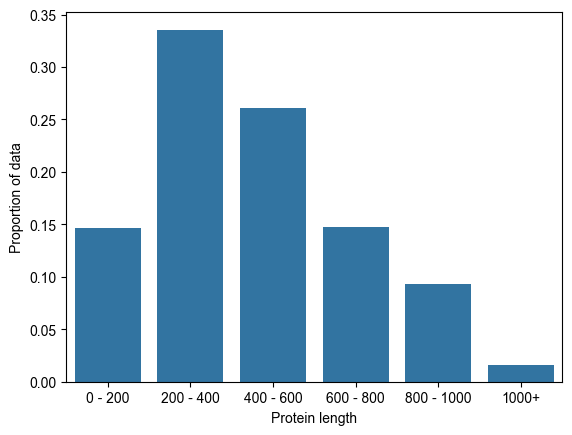

In [34]:
import seaborn as sn

y = [f"{hist[1][i]} - {hist[1][i + 1]}" for i in range(len(hist[1]) - 1)]
y[-1] = f"{hist[1][-2]}+"
ax = sn.barplot(x=y, y=hist[0] / np.sum(hist[0]))
ax.set(xlabel='Protein length', ylabel='Proportion of data')

In [36]:
annotated_df['length_label'] = np.digitize(annotated_df['length'], brackets)
annotated_df

,preds,labels,relevant_sites,pred_indices,length,length_label
A0A024R4G9,"[0.07911567389965057, 0.910444974899292, 0.045...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[16, 20]","[16, 20, 31, 45, 54, 60, 82, 93]",117,1
A0A087WQP5,"[0.9942323565483093, 0.9796654582023621, 0.977...","[1.0, 1.0, 1.0]","[98, 102, 107]","[98, 102, 107]",138,1
A0A0R4J0D1,"[7.239303522510454e-05, 0.0005106111639179289,...","[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[25, 28, 355]","[4, 19, 25, 26, 28, 50, 79, 85, 143, 149, 150,...",363,2
A0PJX2,"[0.9849071502685547, 0.9922882914543152, 0.000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[153, 155]","[13, 20, 53, 57, 59, 65, 78, 84, 89, 92, 101, ...",215,2
A1IGU4,"[0.5324029326438904, 0.003423320595175028, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[201],"[10, 11, 13, 15, 23, 27, 44, 54, 58, 73, 82, 8...",676,4
...,...,...,...,...,...,...
XP_228801,"[0.03142569586634636, 0.00014448192087002099, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[249, 250, 259]","[18, 25, 35, 42, 52, 59, 69, 76, 86, 93, 98, 1...",513,3
XP_357051,"[0.0002774195745587349, 0.0023367460817098618,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[197],"[3, 5, 32, 33, 53, 70, 71, 99, 118, 119, 132, ...",976,5
XP_574346,"[2.938601392088458e-05, 0.00029009860008955, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[276, 281]","[36, 41, 44, 80, 85, 87, 88, 103, 109, 142, 14...",463,3
XP_575592,"[5.0942857342306525e-05, 0.0001765171036822721...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[330, 346, 347, 421]","[10, 34, 61, 66, 82, 93, 94, 95, 106, 118, 127...",513,3


In [45]:
from functools import partial

def gather_fn(vals, buffer):
    buffer.extend(vals)


results = {label : {} for label in annotated_df['length_label'].unique()}
# Calculate metrics for every length label
for label in annotated_df['length_label'].unique():
    data = annotated_df[['preds', 'labels']][annotated_df['length_label'] == label]

    # Extract predictions and labels into a single list, to be processed by metrics
    preds = []
    labels = []
    data['preds'].apply(partial(gather_fn, buffer=preds))
    data['labels'].apply(partial(gather_fn, buffer=labels))

    labels = np.asarray(labels, np.int8)
    binary_preds = (np.asarray(preds) > 0.5).astype(np.int8)

    # Calculate metrics
    metrics = f1_score, precision_score, recall_score, average_precision_score, matthews_corrcoef, roc_auc_score
    names = ['f1', 'precision', 'recall', 'auprc', 'mcc', 'auroc']
    for metric, name in zip(metrics, names):
        try:
            results[label][name] = metric(labels, preds)
        except ValueError:
            results[label][name] = metric(labels, binary_preds)

results

{1: {'f1': 0.3327556325823224,
  'precision': 0.4201312910284464,
  'recall': 0.27546628407460544,
  'auprc': 0.32908988421736723,
  'mcc': 0.23182156810687712,
  'auroc': 0.6675410771977704},
 2: {'f1': 0.26685393258426965,
  'precision': 0.3815261044176707,
  'recall': 0.20518358531317496,
  'auprc': 0.2690127807046394,
  'mcc': 0.20680807052152644,
  'auroc': 0.669488407421927},
 4: {'f1': 0.26554621848739496,
  'precision': 0.42702702702702705,
  'recall': 0.1926829268292683,
  'auprc': 0.3020144638565666,
  'mcc': 0.22216852336362725,
  'auroc': 0.7093168818520799},
 3: {'f1': 0.2704761904761905,
  'precision': 0.3969252271139064,
  'recall': 0.20512820512820512,
  'auprc': 0.27699992182707817,
  'mcc': 0.22169596721765653,
  'auroc': 0.7007078101343638},
 5: {'f1': 0.2717010509926041,
  'precision': 0.40866510538641687,
  'recall': 0.20349854227405248,
  'auprc': 0.28714097294825264,
  'mcc': 0.23425347414781642,
  'auroc': 0.7355259981294179},
 6: {'f1': 0.16591928251121077,
  '

In [46]:
data = annotated_df[['preds', 'labels']]

# Extract predictions and labels into a single list, to be processed by metrics
preds = []
labels = []
data['preds'].apply(partial(gather_fn, buffer=preds))
data['labels'].apply(partial(gather_fn, buffer=labels))

labels = np.asarray(labels, np.int8)
binary_preds = (np.asarray(preds) > 0.5).astype(np.int8)

# Calculate metrics
metrics = f1_score, precision_score, recall_score, average_precision_score, matthews_corrcoef, roc_auc_score
names = ['f1', 'precision', 'recall', 'auprc', 'mcc', 'auroc']
for metric, name in zip(metrics, names):
    try:
        print(f'{name} : {metric(labels, preds)}') 
    except ValueError:
        print(f'{name} : {metric(labels, binary_preds)}')

f1 : 0.27034002193689916
precision : 0.40157178455050796
recall : 0.2037541334370745
auprc : 0.2818945525281186
mcc : 0.22033713267834326
auroc : 0.6992562152179566


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, average_precision_score

for prot in annotated.keys():
    length = len(prot_info.loc[prot]['sequence'])


In [91]:
import torch

unanotated = torch.load('../data/preds/encoder_S_60_focal_preds.pt', map_location='cpu')

TypeError: tuple.count() takes exactly one argument (0 given)